In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## import the library below:

In [15]:
from PyEyeSim import EyeData


In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [17]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [18]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


In [19]:
# For each stimfile and for each sid find the subject of the group 0 with the most fixations
list_task = FixData['stimfile'].unique()
Data = FixData[FixData['class_id'] == 0] 
Tasks = Data.groupby(['stimfile','sid']).size().reset_index(name='counts')
list_max = {}
for task in list_task:
    Task = Tasks[Tasks['stimfile'] == task]
    Task = Task.sort_values(by='counts', ascending=False)
    list_max[task] = Task.head(1)['counts'].values[0]
    print(Task.head(1))
    print('')

             stimfile   sid  counts
22  s7_stimuli_t1.jpg  1257     202

             stimfile   sid  counts
65  s7_stimuli_t4.jpg  1322     225

             stimfile   sid  counts
71  s7_stimuli_t5.jpg  1016     286



In [20]:
# Filter FixData to keep at maximum list_max fixations for each task for every subject
filtered_data = pd.DataFrame()

for task in list_max.keys():
    task_max_fixations = list_max[task]
    task_data = FixData[FixData['stimfile'] == task]
    task_filtered_data = pd.DataFrame()
    for sid in task_data['sid'].unique():
        sid_data = task_data[task_data['sid'] == sid]
        sid_data = sid_data.head(task_max_fixations)
        task_filtered_data = pd.concat([task_filtered_data, sid_data])
    filtered_data = pd.concat([filtered_data, task_filtered_data])

filtered_data = filtered_data.reset_index(drop=True)
FixData = filtered_data

dataset size:  (43654, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  207.88  +/-  2

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

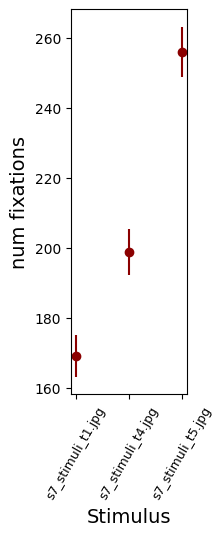

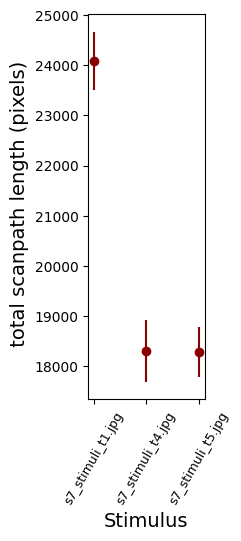

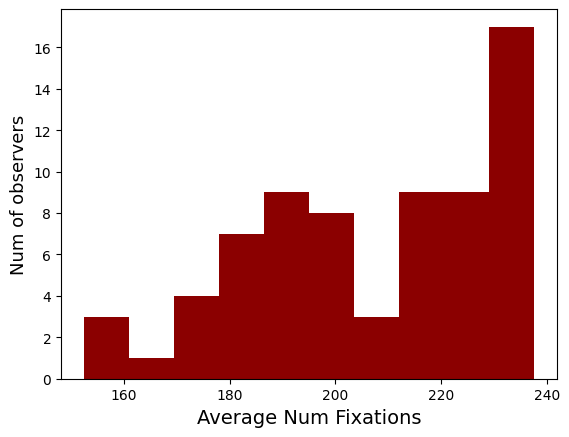

In [21]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1)


In [22]:
CondIdx, Cond = DyslexiaDat.GetGroups('class_id')

Conditions [0 1]


In [24]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1,InferS=False)

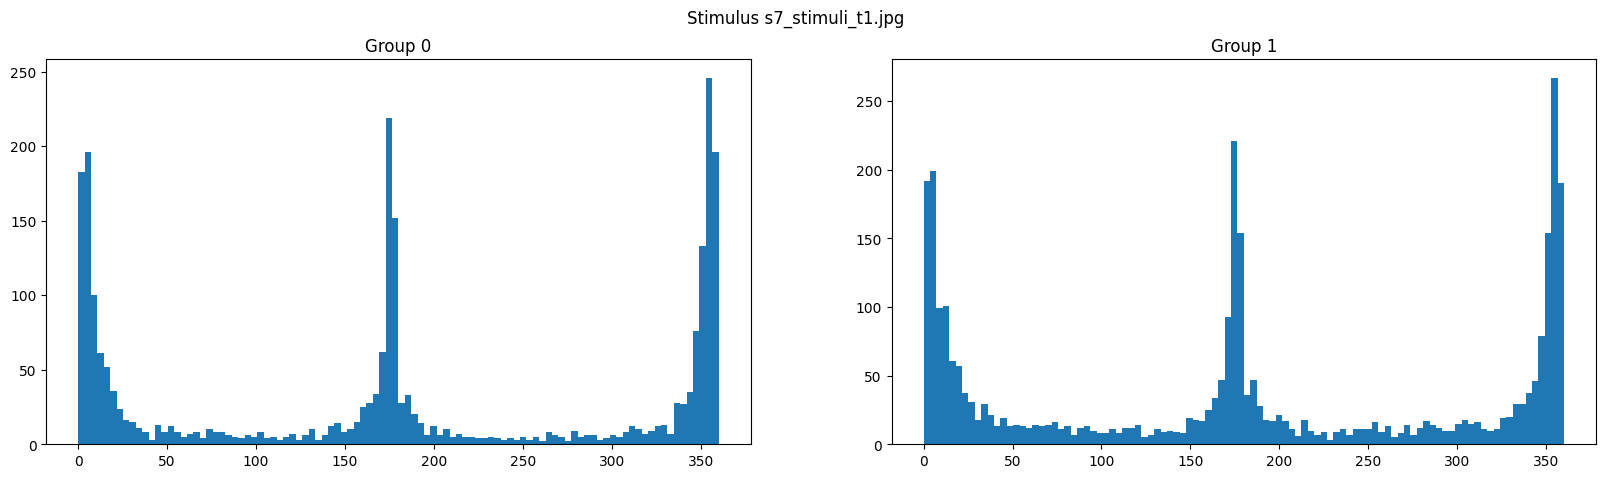

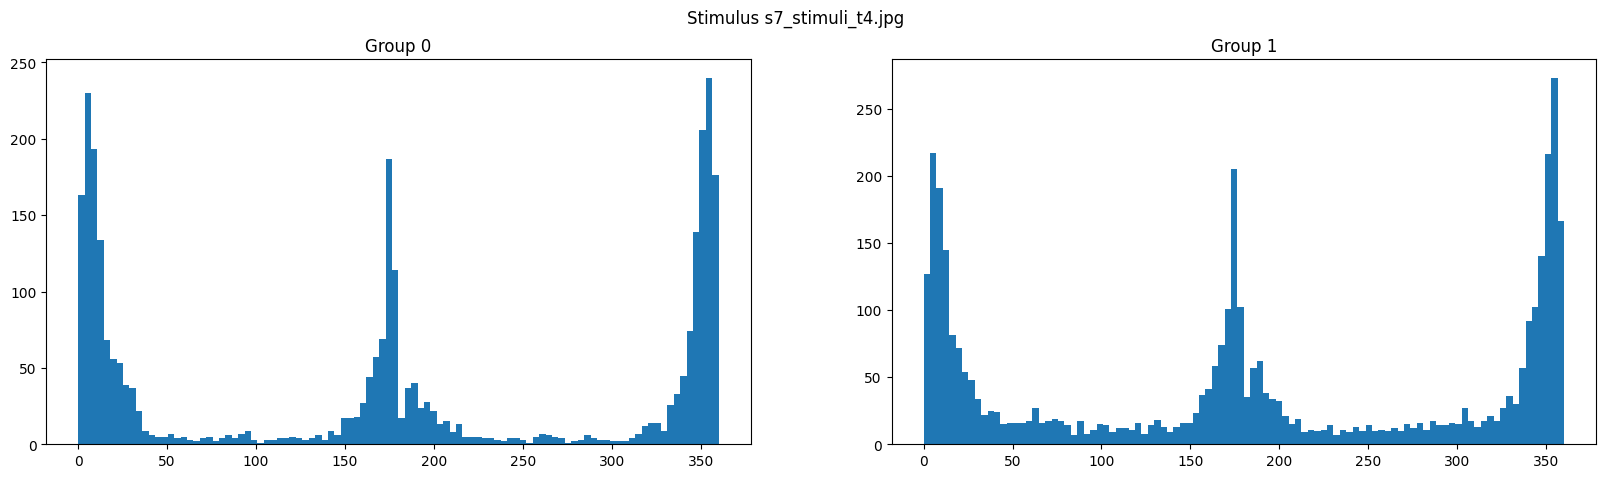

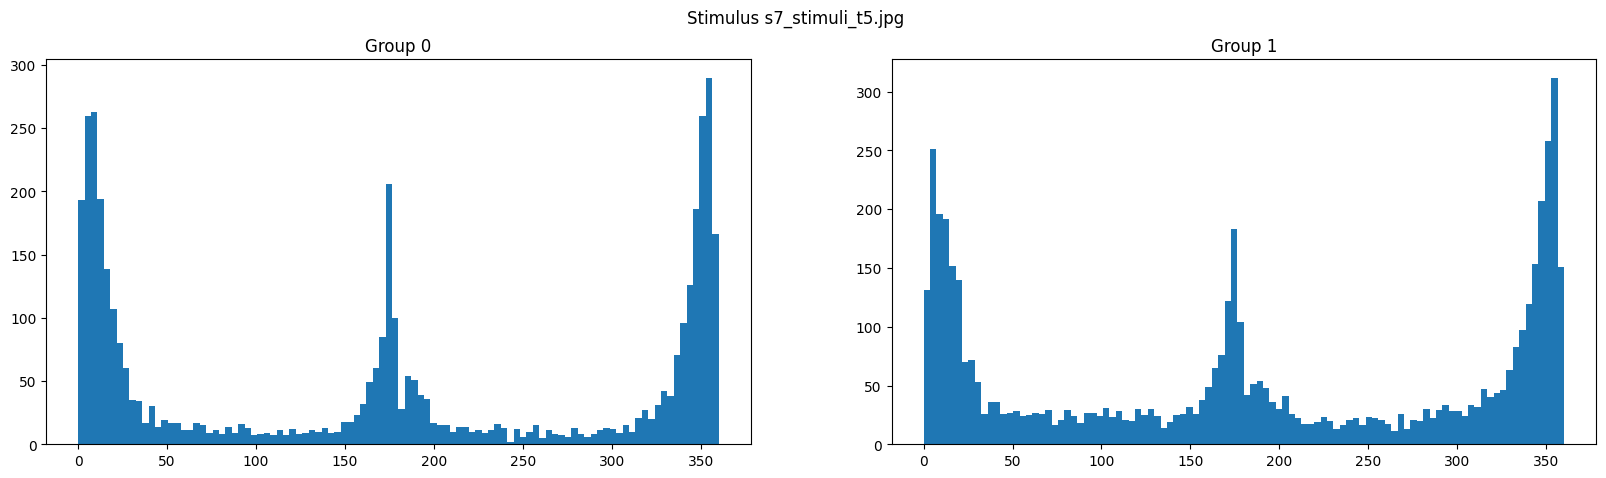

In [25]:
for i,stim in enumerate(DyslexiaDat.stimuli):
    # for every group of subjects show an istogram with the distribution of the saccades angles
    groups = np.unique(Cond)
    group_saccades = []
    for group in groups:
        # from Saccades[subject, :,:] get only the subjects that are in the group
        group_saccades.append(Saccades[Cond==group,i,:,:])

    group_saccades = np.array(group_saccades)
    fig, ax = plt.subplots(1, len(groups), figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')

    for j, group in enumerate(group_saccades):
        angles = []
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h,v]:
                        angles.append(val)
        ax[j].hist(angles, bins=100)
        ax[j].set_title(f'Group {j}')

In [78]:
def split_subjects(matrix, group_list):
    # get unique groups
    groups = np.unique(group_list)
    # create the new matrix
    M = []
    list_subj = []
    for group in groups:
        idx = np.where(group_list == group)[0]
        M.append(matrix[idx][:, idx])
        list_subj.append(idx)
    return M, list_subj

In [79]:
def matrix_subject_reorder(matrix, list_subj):
    M = np.zeros_like(matrix)
    for i, idx1 in enumerate(list_subj):
        for j, idx2 in enumerate(list_subj):
            M[i, j] = matrix[idx1, idx2]
    return M

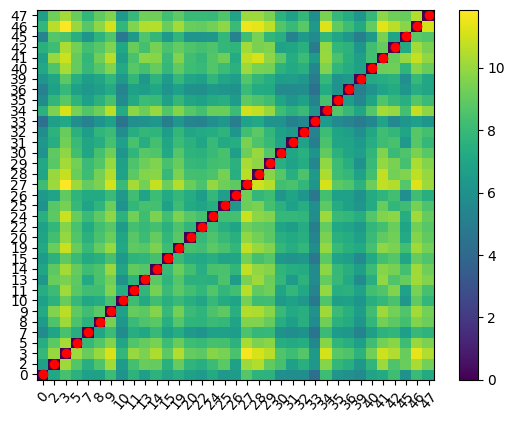

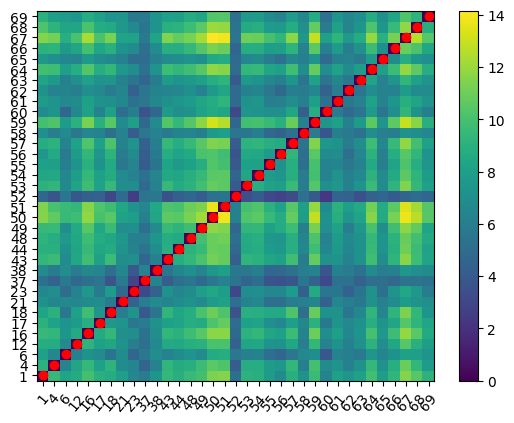

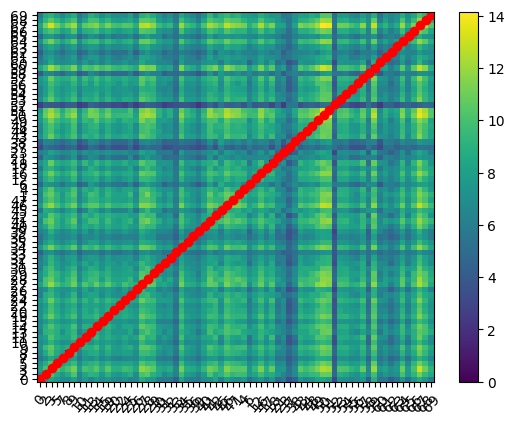

In [80]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False)
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


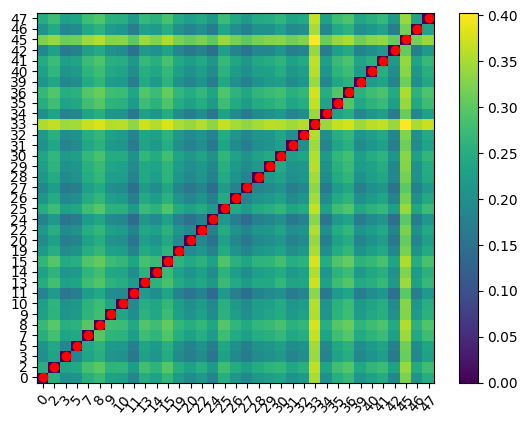

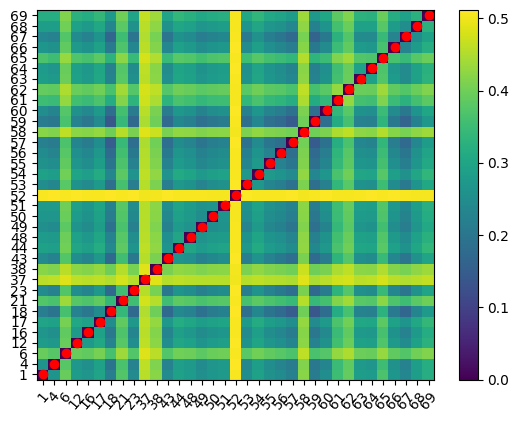

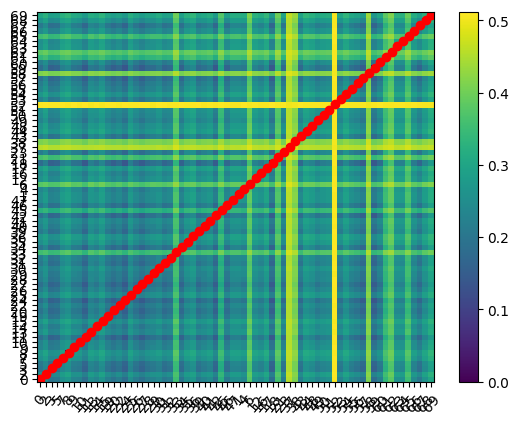

In [81]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False,method='power')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


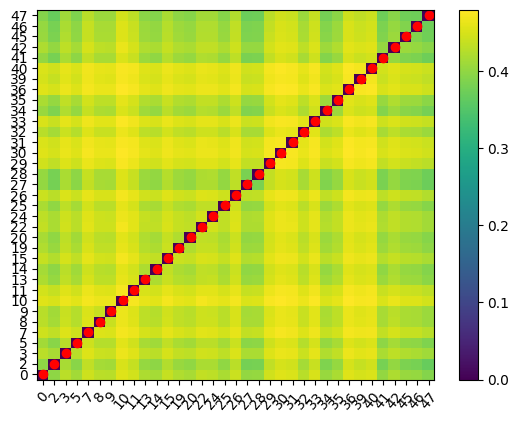

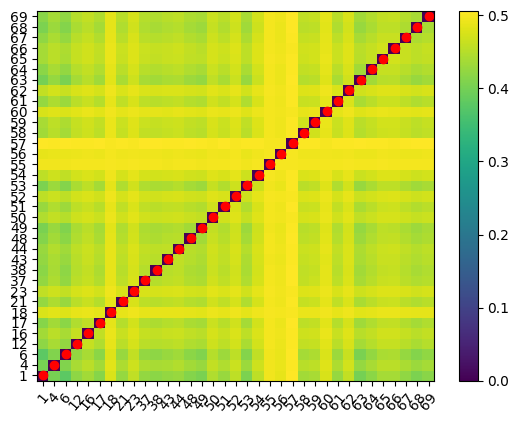

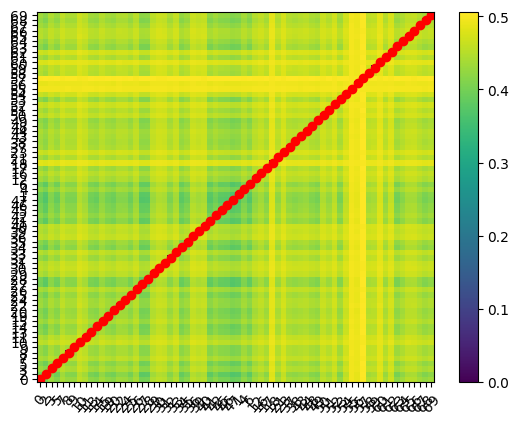

In [82]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False,method='peak180')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

---

0 1


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


calculating all to all similarity with div 1*1 took 5.969 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:308: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:309: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


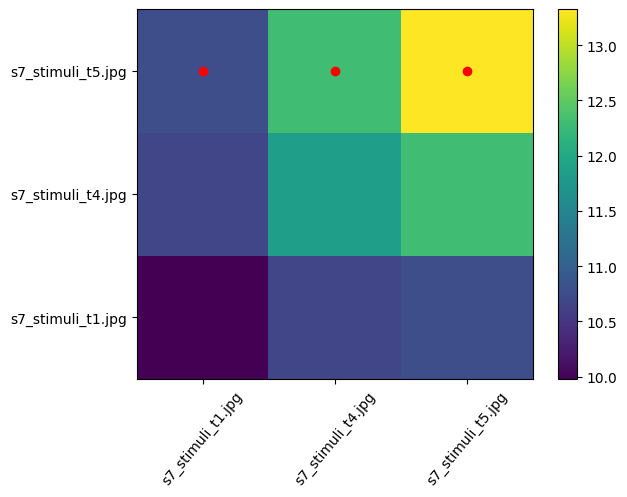

In [83]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[1], Thr=10, InferS=False, normalize='add')
DyslexiaDat.VisSimmat(S0[0])

0 1


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


calculating all to all similarity with div 1*1 took 5.784 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:308: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:309: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


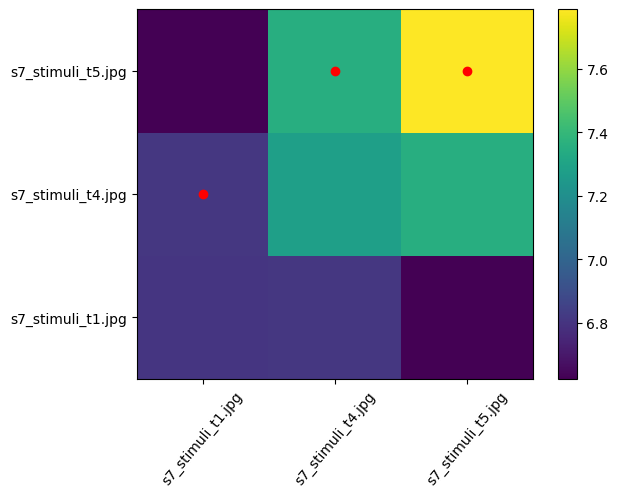

In [84]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[1], InferS=False, method='power')
DyslexiaDat.VisSimmat(S0[0])

0 1


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


calculating all to all similarity with div 1*1 took 5.474 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:308: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:309: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


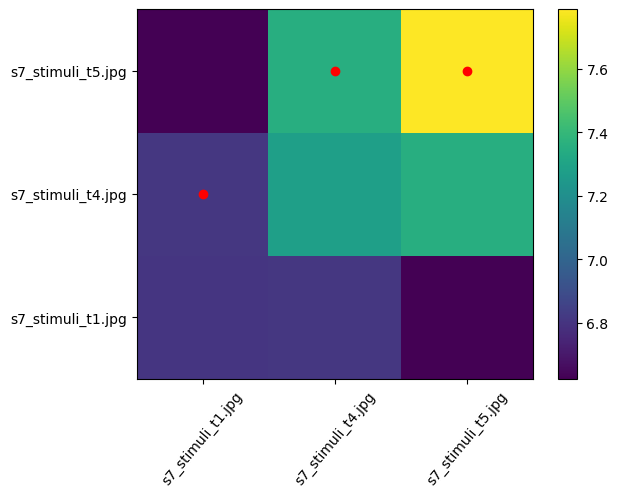

In [85]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[1], InferS=False, method='peak180')
DyslexiaDat.VisSimmat(S0[0])

0 9


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


calculating all to all similarity with div 9*9 took 52.092 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:308: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:309: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


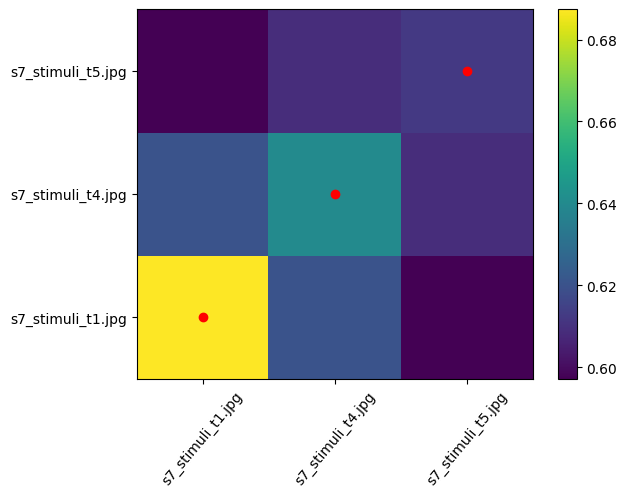

In [86]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[9], Thr=10, InferS=False, normalize='add')
DyslexiaDat.VisSimmat(S0[0])

0 9


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


calculating all to all similarity with div 9*9 took 53.360 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:308: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:309: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


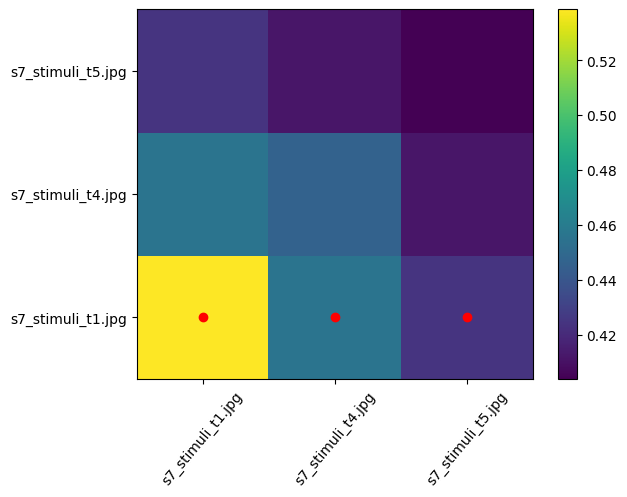

In [87]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[9], InferS=False, method='power')
DyslexiaDat.VisSimmat(S0[0])

0 9


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


calculating all to all similarity with div 9*9 took 73.546 sec


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:308: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:309: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)


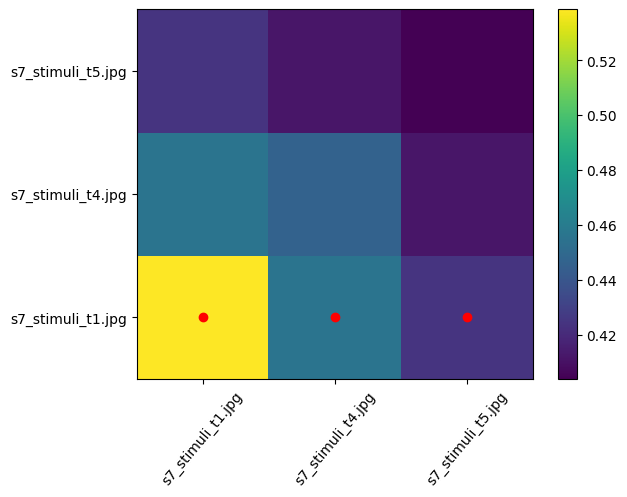

In [88]:
S0,S1,S2 = DyslexiaDat.SacSimPipelineAll2All(divs=[9], InferS=False, method='peak180')
DyslexiaDat.VisSimmat(S0[0])

---

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Conditions [0 1]


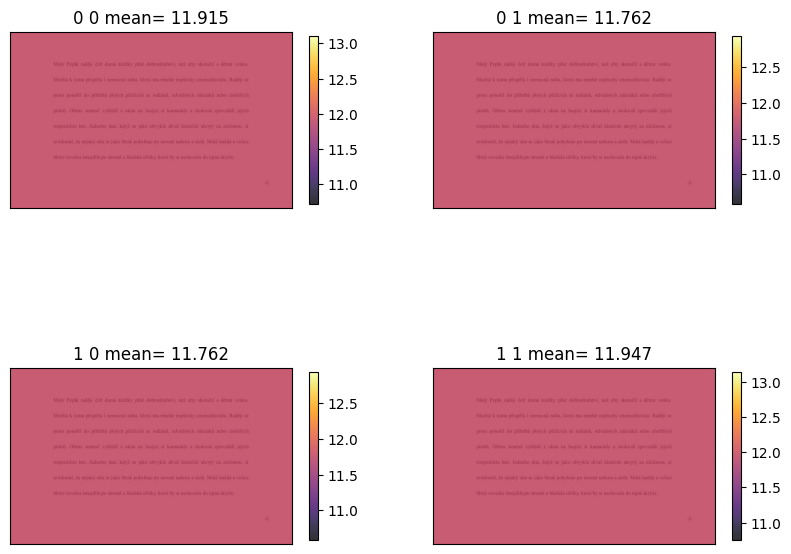

In [90]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, Thr=10, inferS=False)

Conditions [0 1]


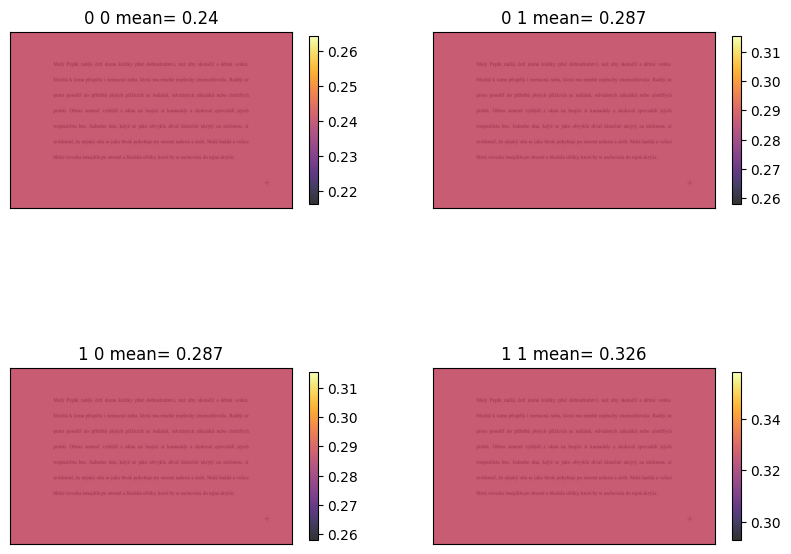

In [91]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='power')

Conditions [0 1]


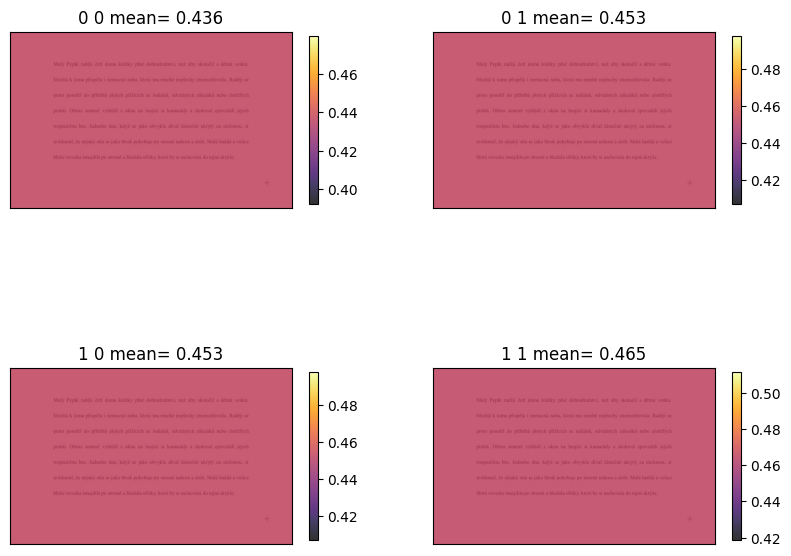

In [92]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='peak180')

---

In [26]:
_,WhichCN=DyslexiaDat.GetGroups('class_id')
WhichCN

Conditions [0 1]


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

resolution x = 1680  y = 1050
dimensions= (70, 1050, 1680)
reduced dims (70, 132, 210)
Conditions [0 1]
num observers in group 1: 35
num observers in group 2: 35
100 permutations starting


36.38230387105237

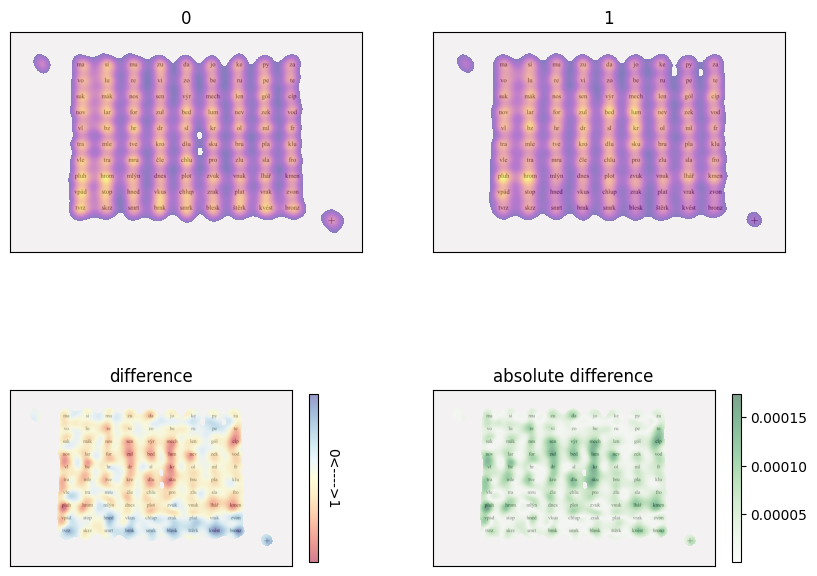

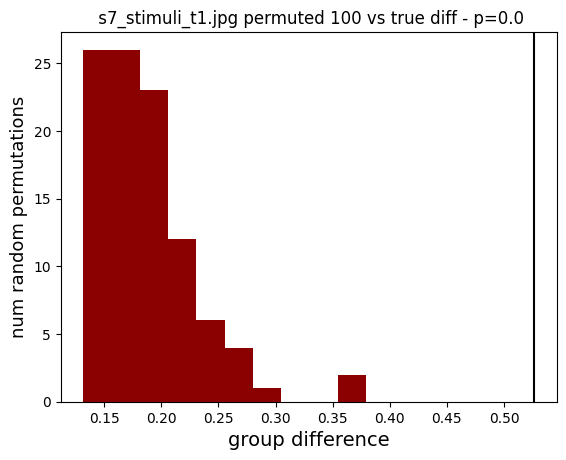

In [28]:
DyslexiaDat.CompareGroupsHeatmap(DyslexiaDat.stimuli[0],'class_id')

resolution x = 1680  y = 1050
dimensions= (70, 1050, 1680)
reduced dims (70, 132, 210)
Conditions [0 1]
num observers in group 1: 35
num observers in group 2: 35
100 permutations starting


73.57810152760798

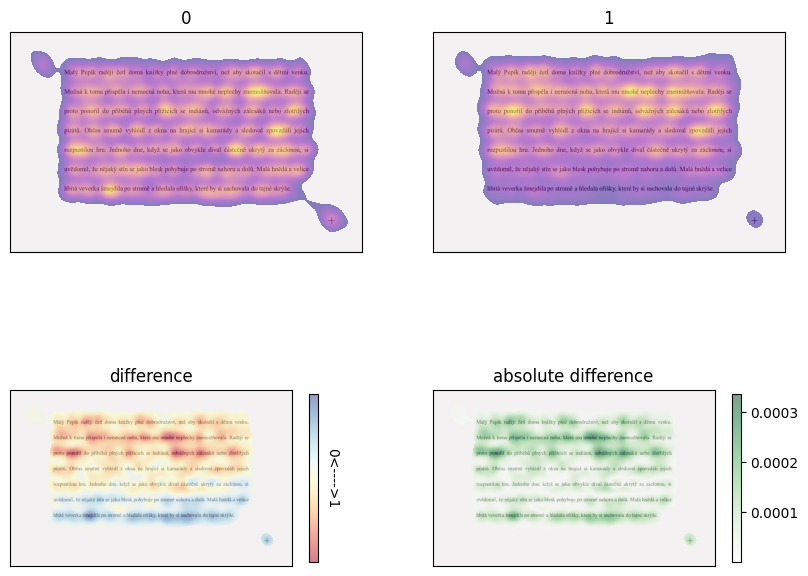

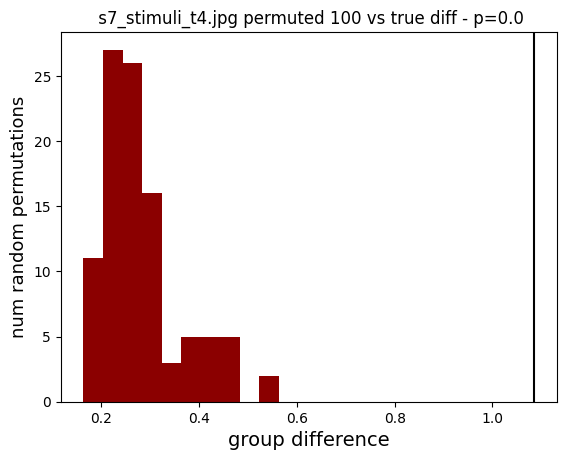

In [27]:
DyslexiaDat.CompareGroupsHeatmap(DyslexiaDat.stimuli[1],'class_id')

resolution x = 1680  y = 1050
dimensions= (70, 1050, 1680)
reduced dims (70, 132, 210)
Conditions [0 1]
num observers in group 1: 35
num observers in group 2: 35
100 permutations starting


86.61383496529854

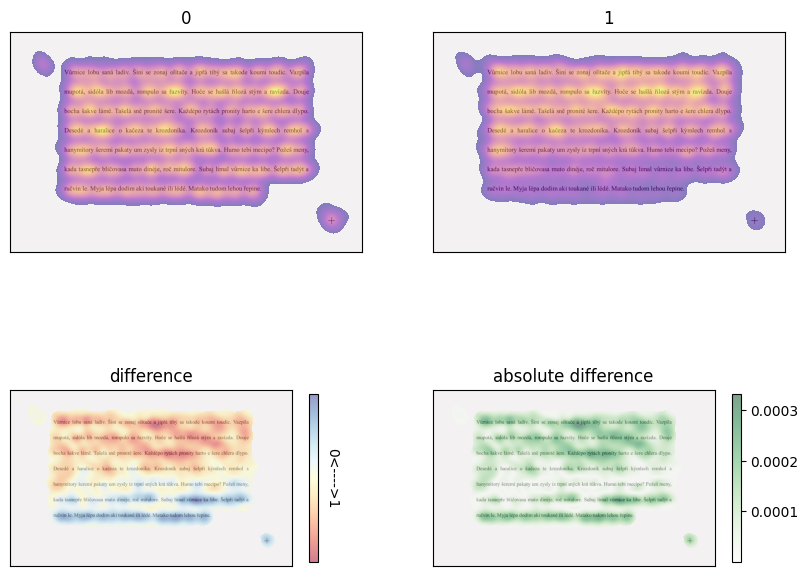

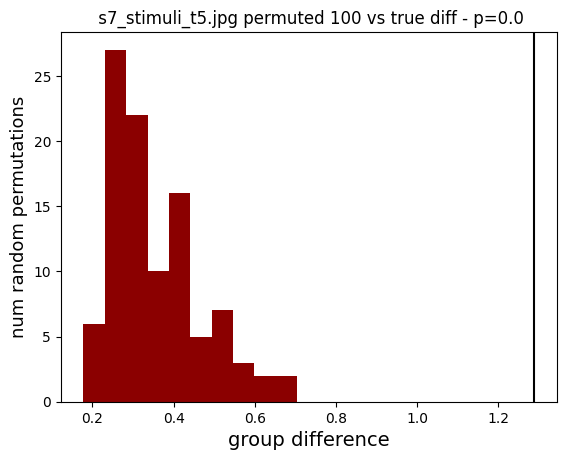

In [29]:
DyslexiaDat.CompareGroupsHeatmap(DyslexiaDat.stimuli[2],'class_id')

In [94]:
def sim_classification(SimVals,list_subj,betwcond, summary=False, verbose=False):
    _,WhichCN=DyslexiaDat.GetGroups(betwcond)
    correct = 0
    false_positives = 0
    false_negatives = 0
    for subj_idx, subj in enumerate(list_subj):
        if not summary and verbose:
            print(f'Subject {subj} is in group {WhichCN[subj]}')
        means = []
        for group in np.unique(WhichCN):
            means.append(np.mean(SimVals[subj_idx][group]))
        if np.argmin(means) == WhichCN[subj]:
            correct += 1
            if not summary and verbose:
                print('Correctly classified')
        else:
            if not summary and verbose:
                print(f'Incorrectly classified as group {np.argmin(means)}')
            if WhichCN[subj] == 0:
                false_negatives += 1
            else:
                false_positives += 1
        if not summary and verbose:
            print('')
    if summary and verbose:
        # print percentage of correct classifications
        print(f'Correctly classified: {correct/len(list_subj)*100}%')
        print(f'False negatives: {false_negatives/len(list_subj)*100}%')
        print(f'False positives: {false_positives/len(list_subj)*100}%')
    accuracy = correct/len(list_subj)*100
    if not verbose:
        return accuracy

In [95]:
# select n random subjects
n = 5
subj = np.random.choice(DyslexiaDat.ns, n)
subj

array([66, 40, 19, 16, 17])

In [96]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, Thr=10, normalize='add')

Conditions [0 1]


In [97]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]


40.0

In [98]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='power')

Conditions [0 1]


In [99]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]


40.0

In [100]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180')

Conditions [0 1]


In [101]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]


80.0

In [102]:
subj = range(DyslexiaDat.ns)

In [103]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, Thr=10, normalize='add')
sim_classification(SimVals,list(subj),'class_id', summary=True)

Conditions [0 1]
Conditions [0 1]


37.142857142857146

In [104]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='power')
sim_classification(SimVals,list(subj),'class_id', summary=True)

Conditions [0 1]
Conditions [0 1]


51.42857142857142

In [105]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180')
sim_classification(SimVals,list(subj),'class_id', summary=True)

Conditions [0 1]
Conditions [0 1]


65.71428571428571

---

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Conditions [0 1]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:345: RuntimeWarning: Mean of empty slice
  Vals=np.nanmean(np.nanmean(SimSacP[Idxs[cgr1],:,stimn,:,:][:,Idxs[cgr2],:,:],0),0)


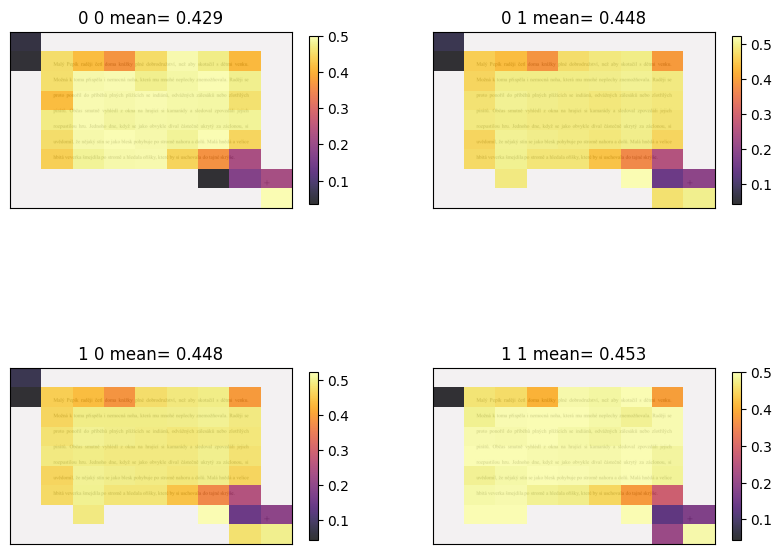

In [161]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='peak180')

In [162]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=[1], nHor=9, inferS=False, method='peak180')

Conditions [0 1]


In [163]:
sim_classification(SimVals,[1],'class_id', summary=True)

Conditions [0 1]
Correctly classified: 0.0%
False negatives: 0.0%
False positives: 100.0%


In [164]:
print(np.nanmean(SimVals[0][0]))
print(np.nanmean(SimVals[0][1]))

0.4505343621172416
0.4520228769781352


In [107]:
def sim_classification_closestmean(SimVals,list_subj,betwcond, mean_g0, mean_g1, summary=False, verbose=True):
    _,WhichCN=DyslexiaDat.GetGroups(betwcond)
    correct = 0
    false_positives = 0
    false_negatives = 0
    for subj_idx, subj in enumerate(list_subj):
        if not summary and verbose:
            print(f'Subject {subj} is in group {WhichCN[subj]}')
        means = []
        for group in np.unique(WhichCN):
            means.append(np.mean(SimVals[subj_idx][group]))
        if np.abs(means[0] - mean_g0) < np.abs(means[1] - mean_g1) and WhichCN[subj] == 0:
            correct += 1
            if not summary and verbose:
                print('Correctly classified')
        elif np.abs(means[0] - mean_g0) > np.abs(means[1] - mean_g1) and WhichCN[subj] == 1:
            correct += 1
            if not summary and verbose:
                print('Correctly classified')
        else:
            if not summary and verbose:
                print(f'Incorrectly classified as group {np.argmin(means)}')
            if WhichCN[subj] == 0:
                false_negatives += 1
            else:
                false_positives += 1
        if not summary and verbose:
            print('')
    if summary and verbose:
        # print percentage of correct classifications
        print(f'Correctly classified: {correct/len(list_subj)*100}%')
        print(f'False negatives: {false_negatives/len(list_subj)*100}%')
        print(f'False positives: {false_positives/len(list_subj)*100}%')
    accuracy = correct/len(list_subj)*100
    if not verbose:
        return accuracy

In [166]:
sim_classification_closestmean(SimVals,[1],'class_id', summary=True, mean_g0=0.429, mean_g1=0.452)

Conditions [0 1]
Correctly classified: 100.0%
False negatives: 0.0%
False positives: 0.0%


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Conditions [0 1]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:345: RuntimeWarning: Mean of empty slice
  Vals=np.nanmean(np.nanmean(SimSacP[Idxs[cgr1],:,stimn,:,:][:,Idxs[cgr2],:,:],0),0)


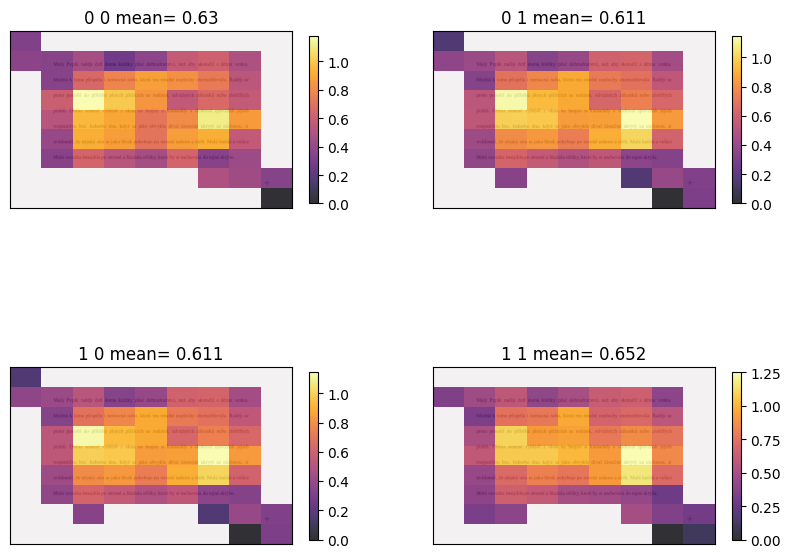

In [168]:
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, Thr=10, normalize='add')

In [169]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, Thr=10, normalize='add')
sim_classification_closestmean(SimVals,list(subj),'class_id', summary=True, mean_g0=0.63, mean_g1=0.652)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Conditions [0 1]
Conditions [0 1]
Correctly classified: 48.57142857142857%
False negatives: 1.4285714285714286%
False positives: 50.0%


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Conditions [0 1]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:345: RuntimeWarning: Mean of empty slice
  Vals=np.nanmean(np.nanmean(SimSacP[Idxs[cgr1],:,stimn,:,:][:,Idxs[cgr2],:,:],0),0)


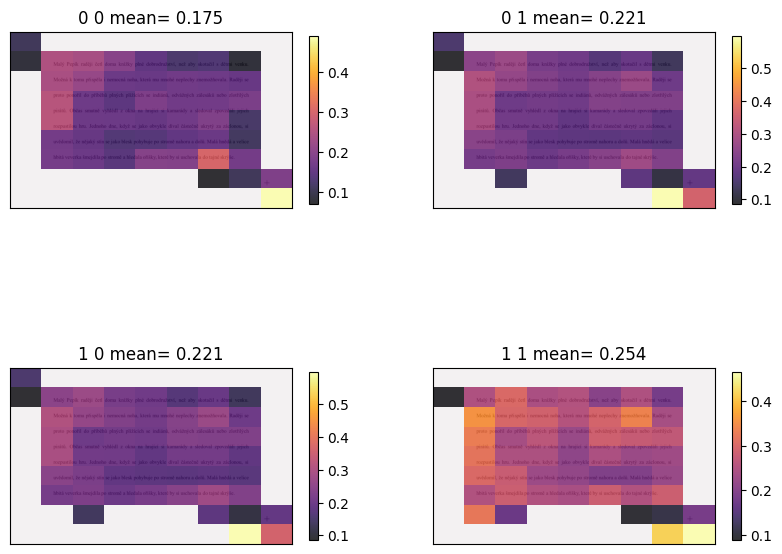

In [170]:
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='power')

In [172]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='power')
sim_classification_closestmean(SimVals,list(subj),'class_id', summary=True, mean_g0=0.175, mean_g1=0.254)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 64.28571428571429%
False negatives: 11.428571428571429%
False positives: 24.285714285714285%


In [173]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180')
sim_classification_closestmean(SimVals,list(subj),'class_id', summary=True, mean_g0=0.429, mean_g1=0.452)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 60.0%
False negatives: 40.0%
False positives: 0.0%


---

Conditions [0 1]


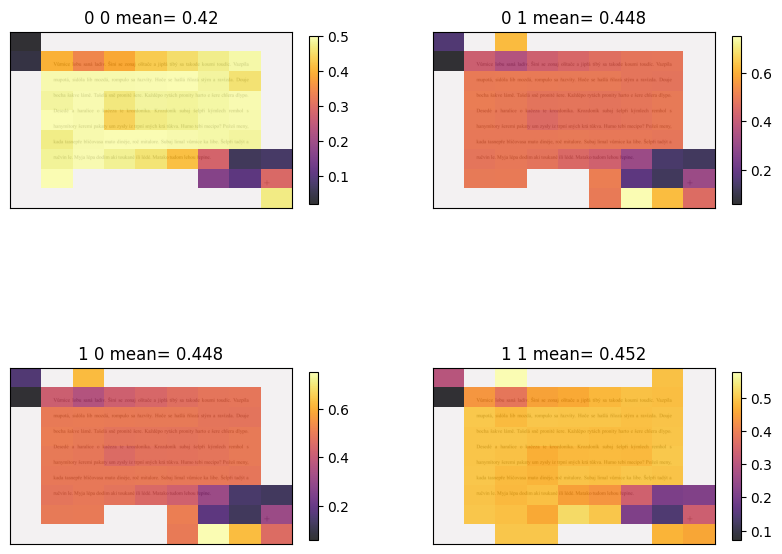

In [177]:
stimn = 2
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='peak180')

In [181]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=2, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180')
sim_classification_closestmean(SimVals,list(subj),'class_id', summary=True, mean_g0=0.42, mean_g1=0.452)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 51.42857142857142%
False negatives: 47.14285714285714%
False positives: 1.4285714285714286%


In [182]:
sim_classification(SimVals,list(subj),'class_id', summary=True)

Conditions [0 1]
Correctly classified: 50.0%
False negatives: 0.0%
False positives: 50.0%


---

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to aggregate features (mean, std, min, max for each subject)
def aggregate_subject_features(data, subject_ids):
    aggregated_data = []
    aggregated_labels = []
    for subj in subject_ids:
        subj_data = data[data['sid'] == subj][['orig_fix_x', 'orig_fix_y', 'duration_ms']].values
        features = np.hstack([
            np.mean(subj_data, axis=0),
            np.std(subj_data, axis=0),
            np.min(subj_data, axis=0),
            np.max(subj_data, axis=0)
        ])
        aggregated_data.append(features)
        aggregated_labels.append(data[data['sid'] == subj]['class_id'].iloc[0])  # Assumes all fixations for a subject have the same label
    return np.array(aggregated_data), np.array(aggregated_labels)

# Split data by subject
subj = FixData['sid'].unique()

accuracy = []
for i in range(10):
    train_participants, test_participants = train_test_split(subj, test_size=0.1, random_state=i)

    # Select data for a specific stimulus
    Data=FixData[FixData['stimfile']== 's7_stimuli_t4.jpg']

    train_data = Data[Data['sid'].isin(train_participants)]
    test_data = Data[Data['sid'].isin(test_participants)]

    # Aggregate training and test data
    X_train, y_train = aggregate_subject_features(train_data, train_participants)
    X_test, y_test = aggregate_subject_features(test_data, test_participants)

    # Train Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=5)
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    

print(f'Mean accuracy: {np.mean(accuracy)}')

Mean accuracy: 0.8


---

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [11]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

def get_data(stim, split_size, batch_size, random_state):
    # Splitting by participants
    subj = FixData['sid'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    Data=FixData[FixData['stimfile']== stim]
    train_data = Data[Data['sid'].isin(train_participants)]
    test_data = Data[Data['sid'].isin(test_participants)]

    # calculate the subject with the most fixations
    max_fixations = Data['sid'].value_counts().max()
    #print(f'Subject {Data["sid"].value_counts().idxmax()} has the most fixations ({max_fixations})')

    # Feature selection for each participant
    def extract_features(data):
        features = []
        labels = []
        for subj in data['sid'].unique():
            subj_data = data[data['sid'] == subj][['orig_fix_x', 'orig_fix_y']].values
            features.append(subj_data)
            labels.append(data[data['sid'] == subj]['class_id'].iloc[0])
        return features, labels

    train_features, train_labels = extract_features(train_data)
    test_features, test_labels = extract_features(test_data)

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(pad_size):
                cn = np.sqrt(2 / pad_size) if k != 0 else np.sqrt(1 / pad_size)
                dct_result[k, n] = cn * np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * pad_size)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(data):
        idct_result = np.zeros((data.shape[0], data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(data.shape[0]):
                idct_result[k, n] = np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * data.shape[0])) * (np.sqrt(2 / data.shape[0]) if k != 0 else np.sqrt(1 / data.shape[0])))
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0)

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[:magnitude.shape[0]//2]
        return final_data

    pad = max([len(data) for data in train_features + test_features])
    # Apply the pipeline to all participants
    train_features = [data_output(data, pad) for data in train_features]
    test_features = [data_output(data, pad) for data in test_features]

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    test_labels = torch.tensor(test_labels, dtype=torch.float32)

    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

In [112]:
"""
# 2 plot of the Magnitude spectrum of time domain interpolated signal for group 0 and group 1
plt.figure(figsize=(16, 6))
plt.suptitle('Magnitude spectrum of time domain zero padded signal')
plt.subplot(1, 2, 1)
plt.plot(train_features[1])
plt.title('Subject 1 (Group 0 - Non Dyslexic)')
plt.xlabel('n')
plt.ylabel('abs(X(n)')
plt.subplot(1, 2, 2)
plt.plot(train_features[0])
plt.title('Subject 0 (Group 1 - Dyslexic)')
plt.xlabel('n')
plt.ylabel('abs(X(n))')
plt.show()
"""

"\n# 2 plot of the Magnitude spectrum of time domain interpolated signal for group 0 and group 1\nplt.figure(figsize=(16, 6))\nplt.suptitle('Magnitude spectrum of time domain zero padded signal')\nplt.subplot(1, 2, 1)\nplt.plot(train_features[1])\nplt.title('Subject 1 (Group 0 - Non Dyslexic)')\nplt.xlabel('n')\nplt.ylabel('abs(X(n)')\nplt.subplot(1, 2, 2)\nplt.plot(train_features[0])\nplt.title('Subject 0 (Group 1 - Dyslexic)')\nplt.xlabel('n')\nplt.ylabel('abs(X(n))')\nplt.show()\n"

In [12]:
class FixationCNN(nn.Module):
    def __init__(self):
        super(FixationCNN, self).__init__()
        self.conv1 = nn.Conv1d(2, 8, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(8)
        self.conv2 = nn.Conv1d(8, 16, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(16)
        self.conv3 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(2, 2)
        self.fc1 = None  # Placeholder, defined after calculating the size dynamically
        self.fc2 = nn.Linear(32, 1)  # Binary classification

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        
        # Flatten dynamically
        x = torch.flatten(x, start_dim=1)  
        
        # Define fc1 dynamically on the first pass
        self.fc1 = nn.Linear(x.shape[1], 32)
        
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [13]:
# Verbose
verbose = False

for i in range(10):
    # Model, Loss, and Optimizer
    # In the training Stochastic Gradient Descent algorithm (initial learning speed of 0.01) with a momentum was used to minimize a crossentrophy loss function
    # Split data into training and validation sets

    train_loader, test_loader, train_features, train_labels, test_features, test_labels = get_data('s7_stimuli_t4.jpg', split_size=0.1, batch_size=16, random_state=i)

    train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.1, random_state=42)

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    val_labels = torch.tensor(val_labels, dtype=torch.float32)

    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_labels)
    val_dataset = TensorDataset(val_features, val_labels)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    model = FixationCNN()
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # Training Loop
    num_epochs = 1000
    losses = []
    accuracy = []
    # Early stopping parameters
    early_stop_patience = 100
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.permute(0, 2, 1)
            labels = labels.unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        l = running_loss / len(train_loader)
        losses.append(l)

        # Validation
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            model.eval()
            for inputs, labels in val_loader:
                inputs = inputs.permute(0, 2, 1)
                labels = labels.unsqueeze(1)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                predicted = (outputs >= 0.5).float()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_loss /= len(val_loader)
        accuracy.append(100 * correct / total)
        if verbose:
            print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {l:.4f} - Val Loss: {val_loss:.4f} - Val Acc: {100 * correct / total:.2f}%")
        
        # Early stopping check
        if l < best_loss:
            best_loss = l
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stop_patience:
                if verbose:
                    print("Early stopping triggered")
                break

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    accuracy = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.permute(0, 2, 1)
            labels = labels.unsqueeze(1)
            outputs = model(inputs)
            predicted = (outputs >= 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy.append(100 * correct / total)

print(f"Mean accuracy: {np.mean(accuracy)}%")

C:\Users\nickp\AppData\Local\Temp\ipykernel_29272\2592140791.py:80: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  train_features = torch.tensor(train_features, dtype=torch.float32)
C:\Users\nickp\AppData\Local\Temp\ipykernel_29272\2463690879.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_features = torch.tensor(train_features, dtype=torch.float32)
C:\Users\nickp\AppData\Local\Temp\ipykernel_29272\2463690879.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_

Mean accuracy: 71.42857142857143%


---

In [114]:
def get_subj(split_size, random_state):
    subj = FixData['sid'].unique() 
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    list_subj = []
    for idx,s in enumerate(subj):
        if s in test_participants:
            list_subj.append(idx)
    
    return list_subj

In [117]:
stimn = 1
accuracy = []
for i in range(10):
    list_subj = get_subj(split_size=0.1, random_state=i)
    SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=stimn, betwcond='class_id', subjects=list_subj, nHor=9, inferS=False, method='peak180')
    accuracy.append(sim_classification(SimVals,list_subj,'class_id', summary=True, verbose=False))

print(f"Mean accuracy: {np.mean(accuracy)}%")

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Conditions [0 1]
Mean accuracy: 64.28571428571428%


In [774]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list_subj, nHor=9, inferS=False, method='power')
sim_classification(SimVals,list_subj,'class_id', summary=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 42.857142857142854%
False negatives: 0.0%
False positives: 57.14285714285714%


In [775]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list_subj, nHor=9, inferS=False, Thr=10, normalize='add')
sim_classification(SimVals,list_subj,'class_id', summary=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 14.285714285714285%
False negatives: 42.857142857142854%
False positives: 42.857142857142854%


In [776]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list_subj, nHor=9, inferS=False, method='peak180')

Conditions [0 1]


In [118]:
sim_classification_closestmean(SimVals,list_subj,'class_id', summary=True, mean_g0=0.4, mean_g1=0.5)

Conditions [0 1]
Correctly classified: 71.42857142857143%
False negatives: 28.57142857142857%
False positives: 0.0%
